### Cab Price Prediction using Linear Regression

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
%matplotlib inline

In [2]:
#Load file
cab_df = pd.read_csv('Predict_Cab_Price.csv')

### Exploratory Data Analysis

In [3]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   miles   60 non-null     int64
 1   temp    60 non-null     int64
 2   rain    60 non-null     int64
 3   ncabs   60 non-null     int64
 4   price   60 non-null     int64
dtypes: int64(5)
memory usage: 2.5 KB


observations : 5 rows with 60 non-null in integer datatype

<AxesSubplot:>

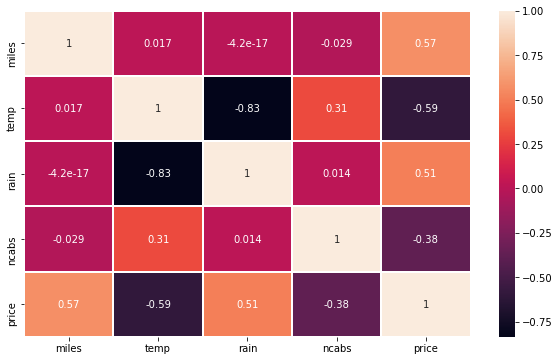

In [4]:
corr = cab_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, linewidths = 1)

observations : There is negative relation between temperature and rain. There is higher chances of rainfall while temperature is low

<AxesSubplot:xlabel='temp', ylabel='price'>

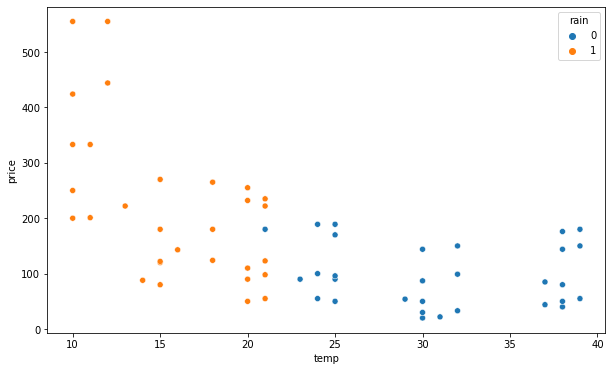

In [137]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = cab_df['temp'], y = cab_df['price'], hue = cab_df['rain'])
#Cab price are higher during low temperature and its raining

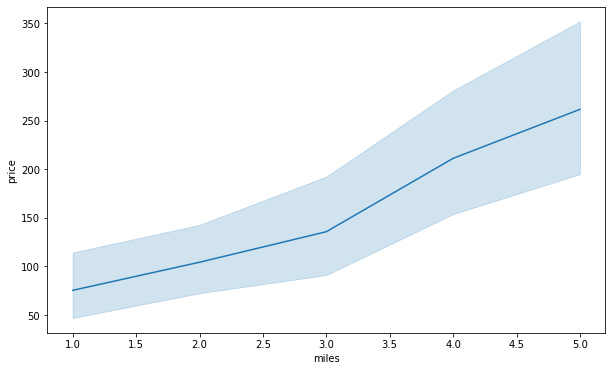

In [141]:
plt.figure(figsize = (10,6))
sns.lineplot(x = cab_df['miles'], y = cab_df['price']);
#Longer the miles travelling, higher will be the price

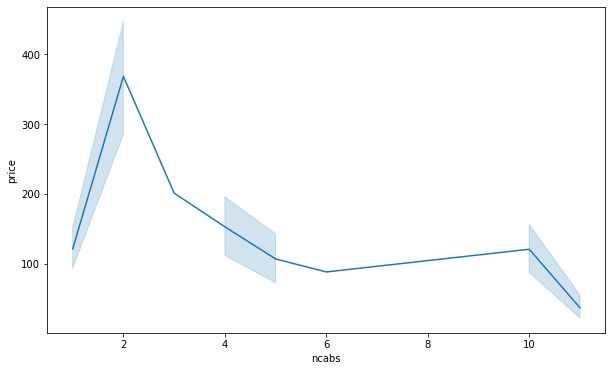

In [154]:
plt.figure(figsize = (10,6))
sns.lineplot(x = cab_df['ncabs'], y = cab_df['price']);
#Larger the no. of cabs, the prices of cab is lower 

### train and test split

In [5]:
X = cab_df.drop(['price'], axis=1)

y = cab_df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### Modelling

In [164]:
lm = LinearRegression()

In [165]:
lm.fit(X_train, y_train)

LinearRegression()

In [166]:
test_pre = lm.predict(X_test)

In [167]:
train_pred = lm.predict(X_train)

### Linear model stats

In [168]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pre))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pre))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pre)))

print('Test R2: ', metrics.r2_score(y_test, test_pre))

Train MAE:  49.94735894595363
Train MSE:  4065.480459049744
Train RSME:  63.76112027756212
Train R2:  0.7503192846106234
-------------------------------
Test MAE:  41.673370945810554
Test MSE:  2999.751361260689
Test RSME:  54.76998595271583
Test R2:  0.6707710418966842


In [117]:
X = sm.add_constant(X)

In [118]:
reg_ols = sm.OLS(y, X).fit()

In [119]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     38.94
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.92e-15
Time:                        22:20:56   Log-Likelihood:                -331.52
No. Observations:                  60   AIC:                             673.0
Df Residuals:                      55   BIC:                             683.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.5308     57.870      2.048      0.045       2.557     234.504
miles         47.6693      5.803      8.215      0.000      36.041      59.298
temp          -3.7564      2.012     -1.867      0.067      -7.788       0.275
rain          65.8331     34.775      1.893      0.064      -3.858     135.524
ncabs         -9.0571      2.799     -3.235      0.002     -14.667      -3.447
==============================================================================
Omnibus:                       13.680   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.913
Skew:                           0.957   Prob(JB):                     0.000350
Kurtosis:                       4.643   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plotting Predicted Values and Actual Values

<AxesSubplot:xlabel='price'>

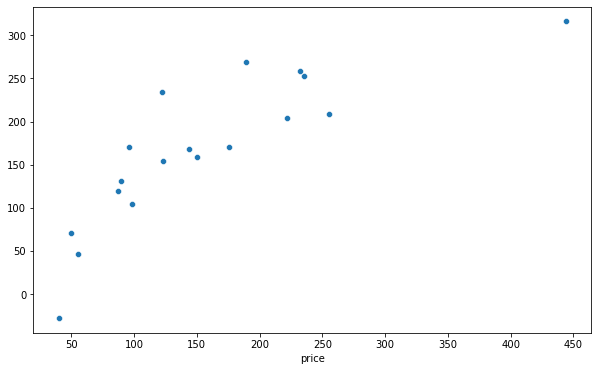

In [169]:
#test set and test predicted set scatter plot 
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = y_pre)

<AxesSubplot:xlabel='price'>

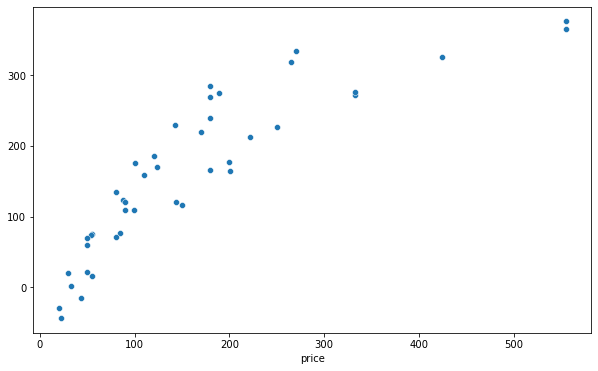

In [170]:
#train set and train predicted set scatter plot 
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_train, y = train_pred)

<AxesSubplot:xlabel='price', ylabel='Density'>

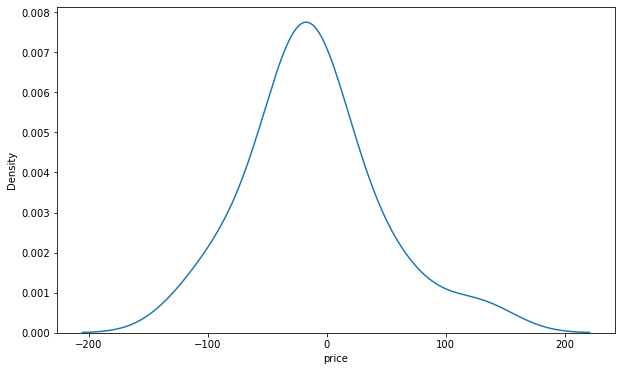

In [150]:
#Errors are following normal distributions
plt.figure(figsize = (10,6))
sns.kdeplot((y_test-y_pre))

<AxesSubplot:ylabel='Density'>

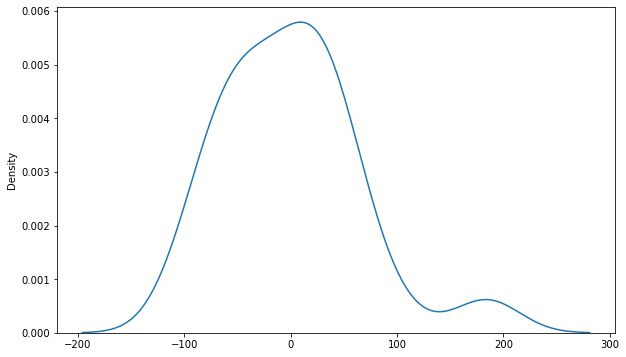

In [151]:
#Errors are following normal distributions
plt.figure(figsize = (10,6))
sns.kdeplot(np.array(y_train) - pre)

In [127]:
print('Intercept: ',round(lm.intercept_,2))
pd.DataFrame(data = lm.coef_, index = cab_df.columns[:4], columns=['Coefficient'])

Intercept:  155.15


,Coefficient
miles,49.584626
temp,-5.014873
rain,39.541065
ncabs,-8.408952


### Interpretations

* For 1 unit increase in miles there will be 49.58 unit price increase
* For 1 unit increase in temperature there will be -5.01 unit price decrease
* For 1 unit increase in rain there will be 39.541 unit price increase
* For 1 unit increase in ncabd there will be 8.40 unit price decrease
* Cab price will have minimum value of 155.15

### KNN

In [7]:
model = KNeighborsRegressor()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [9]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  34.33809523809524
Train MSE:  1898.0961904761903
Train RSME:  43.56714576921686
Train R2:  0.8834287805612234
-------------------------------
Test MAE:  56.48888888888889
Test MSE:  4243.48
Test RSME:  65.1419987412115
Test R2:  0.5342692340524127


#### Decision Tree

In [10]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [11]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  0.0
Train MSE:  0.0
Train RSME:  0.0
Train R2:  1.0
-------------------------------
Test MAE:  28.333333333333332
Test MSE:  2502.777777777778
Test RSME:  50.02777006601212
Test R2:  0.7253149275026524


#### Bagging 

In [12]:
model = BaggingRegressor()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [13]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  11.397619047619045
Train MSE:  280.547857142857
Train RSME:  16.749562894083446
Train R2:  0.982770206282394
-------------------------------
Test MAE:  25.694444444444446
Test MSE:  1542.0138888888891
Test RSME:  39.26848467777805
Test R2:  0.8307607648500664


#### Random Forest

In [14]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [15]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  8.71595238095238
Train MSE:  195.86395952380957
Train RSME:  13.995140568204722
Train R2:  0.9879710518780033
-------------------------------
Test MAE:  27.862222222222222
Test MSE:  1918.0917999999995
Test RSME:  43.796024933776806
Test R2:  0.7894854310208164


#### ADA Boost

In [16]:
model = AdaBoostRegressor()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [17]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  13.65155966426975
Train MSE:  294.5391899625212
Train RSME:  17.1621440957277
Train R2:  0.9819109312169123
-------------------------------
Test MAE:  28.477722277722275
Test MSE:  1871.9773257059849
Test RSME:  43.26635327487151
Test R2:  0.7945465905960286


#### Gradient Boost

In [18]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [19]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  1.3106349287201087
Train MSE:  3.103774448874052
Train RSME:  1.7617532315492008
Train R2:  0.9998093822777878
-------------------------------
Test MAE:  20.139434184905312
Test MSE:  958.2082715853202
Test RSME:  30.95493937298731
Test R2:  0.8948346469730634


#### XGBoost

In [20]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

In [21]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  1.310634928720108
Train MSE:  3.1037744488740486
Train RSME:  1.7617532315492
Train R2:  0.9998093822777878
-------------------------------
Test MAE:  20.03450059724777
Test MSE:  953.3932735142389
Test RSME:  30.877067113219137
Test R2:  0.8953631030373504


#### Catboost

In [22]:
model = CatBoostRegressor()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)

test_pred = model.predict(X_test)

Learning rate set to 0.022199
0:	learn: 126.4690967	total: 64.4ms	remaining: 1m 4s
1:	learn: 125.2305530	total: 64.9ms	remaining: 32.4s
2:	learn: 124.1095111	total: 65.4ms	remaining: 21.7s
3:	learn: 123.0778839	total: 65.8ms	remaining: 16.4s
4:	learn: 121.8223319	total: 66.3ms	remaining: 13.2s
5:	learn: 120.3542420	total: 66.8ms	remaining: 11.1s
6:	learn: 118.9672017	total: 67.4ms	remaining: 9.55s
7:	learn: 117.7291196	total: 67.9ms	remaining: 8.42s
8:	learn: 116.6834118	total: 68.3ms	remaining: 7.52s
9:	learn: 115.3750899	total: 68.9ms	remaining: 6.82s
10:	learn: 114.1962003	total: 69.3ms	remaining: 6.23s
11:	learn: 112.9963643	total: 69.7ms	remaining: 5.74s
12:	learn: 111.7026669	total: 70.2ms	remaining: 5.33s
13:	learn: 110.4217073	total: 70.6ms	remaining: 4.97s
14:	learn: 109.1355948	total: 71ms	remaining: 4.66s
15:	learn: 108.0366180	total: 71.4ms	remaining: 4.39s
16:	learn: 106.9673042	total: 71.9ms	remaining: 4.16s
17:	learn: 105.9890470	total: 72.4ms	remaining: 3.95s
18:	learn:

166:	learn: 25.9940962	total: 149ms	remaining: 745ms
167:	learn: 25.8033204	total: 150ms	remaining: 745ms
168:	learn: 25.5840130	total: 152ms	remaining: 745ms
169:	learn: 25.3502636	total: 152ms	remaining: 742ms
170:	learn: 25.1600497	total: 153ms	remaining: 740ms
171:	learn: 24.9495193	total: 153ms	remaining: 737ms
172:	learn: 24.7553087	total: 154ms	remaining: 734ms
173:	learn: 24.5784245	total: 154ms	remaining: 731ms
174:	learn: 24.3704876	total: 154ms	remaining: 728ms
175:	learn: 24.1586673	total: 155ms	remaining: 725ms
176:	learn: 23.9477627	total: 155ms	remaining: 722ms
177:	learn: 23.7611967	total: 156ms	remaining: 720ms
178:	learn: 23.5620225	total: 156ms	remaining: 717ms
179:	learn: 23.3675750	total: 157ms	remaining: 715ms
180:	learn: 23.1575112	total: 157ms	remaining: 712ms
181:	learn: 22.9572162	total: 158ms	remaining: 710ms
182:	learn: 22.7632599	total: 158ms	remaining: 707ms
183:	learn: 22.5657686	total: 159ms	remaining: 705ms
184:	learn: 22.3796183	total: 159ms	remaining:

417:	learn: 4.3185429	total: 298ms	remaining: 415ms
418:	learn: 4.2956598	total: 299ms	remaining: 415ms
419:	learn: 4.2736155	total: 300ms	remaining: 414ms
420:	learn: 4.2495824	total: 300ms	remaining: 413ms
421:	learn: 4.2271579	total: 301ms	remaining: 412ms
422:	learn: 4.2004443	total: 302ms	remaining: 412ms
423:	learn: 4.1821100	total: 303ms	remaining: 411ms
424:	learn: 4.1609593	total: 303ms	remaining: 410ms
425:	learn: 4.1349044	total: 304ms	remaining: 409ms
426:	learn: 4.1090882	total: 304ms	remaining: 409ms
427:	learn: 4.0836617	total: 305ms	remaining: 408ms
428:	learn: 4.0660417	total: 305ms	remaining: 407ms
429:	learn: 4.0409797	total: 306ms	remaining: 406ms
430:	learn: 4.0209006	total: 307ms	remaining: 405ms
431:	learn: 3.9964008	total: 307ms	remaining: 404ms
432:	learn: 3.9793339	total: 308ms	remaining: 403ms
433:	learn: 3.9552629	total: 308ms	remaining: 402ms
434:	learn: 3.9314081	total: 309ms	remaining: 401ms
435:	learn: 3.9087806	total: 309ms	remaining: 400ms
436:	learn: 

612:	learn: 1.8266012	total: 435ms	remaining: 275ms
613:	learn: 1.8204633	total: 436ms	remaining: 274ms
614:	learn: 1.8149155	total: 436ms	remaining: 273ms
615:	learn: 1.8103006	total: 439ms	remaining: 274ms
616:	learn: 1.8048350	total: 442ms	remaining: 274ms
617:	learn: 1.7987047	total: 442ms	remaining: 273ms
618:	learn: 1.7941768	total: 444ms	remaining: 273ms
619:	learn: 1.7890471	total: 444ms	remaining: 272ms
620:	learn: 1.7832324	total: 445ms	remaining: 272ms
621:	learn: 1.7779493	total: 446ms	remaining: 271ms
622:	learn: 1.7727338	total: 447ms	remaining: 271ms
623:	learn: 1.7683667	total: 448ms	remaining: 270ms
624:	learn: 1.7634498	total: 449ms	remaining: 269ms
625:	learn: 1.7591635	total: 449ms	remaining: 268ms
626:	learn: 1.7540816	total: 450ms	remaining: 268ms
627:	learn: 1.7485685	total: 451ms	remaining: 267ms
628:	learn: 1.7435690	total: 451ms	remaining: 266ms
629:	learn: 1.7370401	total: 452ms	remaining: 265ms
630:	learn: 1.7328998	total: 452ms	remaining: 264ms
631:	learn: 

773:	learn: 1.1635455	total: 564ms	remaining: 165ms
774:	learn: 1.1608504	total: 565ms	remaining: 164ms
775:	learn: 1.1580868	total: 566ms	remaining: 163ms
776:	learn: 1.1557309	total: 567ms	remaining: 163ms
777:	learn: 1.1534028	total: 568ms	remaining: 162ms
778:	learn: 1.1506709	total: 569ms	remaining: 162ms
779:	learn: 1.1481027	total: 570ms	remaining: 161ms
780:	learn: 1.1458079	total: 571ms	remaining: 160ms
781:	learn: 1.1431862	total: 571ms	remaining: 159ms
782:	learn: 1.1404948	total: 572ms	remaining: 158ms
783:	learn: 1.1382289	total: 572ms	remaining: 158ms
784:	learn: 1.1357241	total: 573ms	remaining: 157ms
785:	learn: 1.1334915	total: 573ms	remaining: 156ms
786:	learn: 1.1308324	total: 574ms	remaining: 155ms
787:	learn: 1.1282776	total: 575ms	remaining: 155ms
788:	learn: 1.1256569	total: 576ms	remaining: 154ms
789:	learn: 1.1234501	total: 576ms	remaining: 153ms
790:	learn: 1.1212689	total: 577ms	remaining: 152ms
791:	learn: 1.1188332	total: 577ms	remaining: 152ms
792:	learn: 

944:	learn: 0.7729901	total: 695ms	remaining: 40.5ms
945:	learn: 0.7707485	total: 696ms	remaining: 39.7ms
946:	learn: 0.7691492	total: 696ms	remaining: 39ms
947:	learn: 0.7676447	total: 697ms	remaining: 38.3ms
948:	learn: 0.7654350	total: 698ms	remaining: 37.5ms
949:	learn: 0.7637010	total: 699ms	remaining: 36.8ms
950:	learn: 0.7615095	total: 699ms	remaining: 36ms
951:	learn: 0.7600362	total: 699ms	remaining: 35.3ms
952:	learn: 0.7578700	total: 700ms	remaining: 34.5ms
953:	learn: 0.7566849	total: 700ms	remaining: 33.8ms
954:	learn: 0.7552387	total: 701ms	remaining: 33ms
955:	learn: 0.7531005	total: 704ms	remaining: 32.4ms
956:	learn: 0.7513961	total: 705ms	remaining: 31.7ms
957:	learn: 0.7492753	total: 705ms	remaining: 30.9ms
958:	learn: 0.7478592	total: 707ms	remaining: 30.2ms
959:	learn: 0.7445026	total: 708ms	remaining: 29.5ms
960:	learn: 0.7430296	total: 708ms	remaining: 28.7ms
961:	learn: 0.7413455	total: 708ms	remaining: 28ms
962:	learn: 0.7398849	total: 708ms	remaining: 27.2ms
9

In [23]:
print('Train MAE: ',metrics.mean_absolute_error(y_train, train_pred))

print('Train MSE: ',metrics.mean_squared_error(y_train, train_pred))

print('Train RSME: ',np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

print('Train R2: ', metrics.r2_score(y_train, train_pred))

print('-------------------------------')

print('Test MAE: ',metrics.mean_absolute_error(y_test, test_pred))

print('Test MSE: ',metrics.mean_squared_error(y_test, test_pred))

print('Test RSME: ',np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

print('Test R2: ', metrics.r2_score(y_test, test_pred))

Train MAE:  0.5133938384187722
Train MSE:  0.4687692555495088
Train RSME:  0.6846672590021439
Train R2:  0.9999712106246096
-------------------------------
Test MAE:  20.688778127736164
Test MSE:  1095.9663607926502
Test RSME:  33.10538265588619
Test R2:  0.8797154098370321


#### Ligh